<a href="https://colab.research.google.com/github/ZiadSakr5/ZezoSakr/blob/main/Copy_of_Regression_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
m = 2.5
c = 4.0

In [ ]:
np.random.seed(42)
X = np.linspace(0, 250, 100)

In [ ]:
Y = m * X + c

In [ ]:
noise = np.random.normal(0, 5, size=Y.shape)
Y_noisy = Y + noise

In [ ]:
df = pd.DataFrame({'X': X, 'Y': Y_noisy})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['X']], df['Y'], test_size=0.2, random_state=42
)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Learned slope (m):", model.coef_[0])
print("Learned intercept (c):", model.intercept_)

Learned slope (m): 2.5024168071875184
Learned intercept (c): 3.0989260649172365


In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train - MAE: {train_mae:.2f}, MSE: {train_mse:.2f}, R²: {train_r2:.4f}")

Train - MAE: 3.72, MSE: 21.59, R²: 0.9994


In [ ]:
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test  - MAE: {test_mae:.2f}, MSE: {test_mse:.2f}, R²: {test_r2:.4f}")

Test  - MAE: 3.01, MSE: 15.55, R²: 0.9995


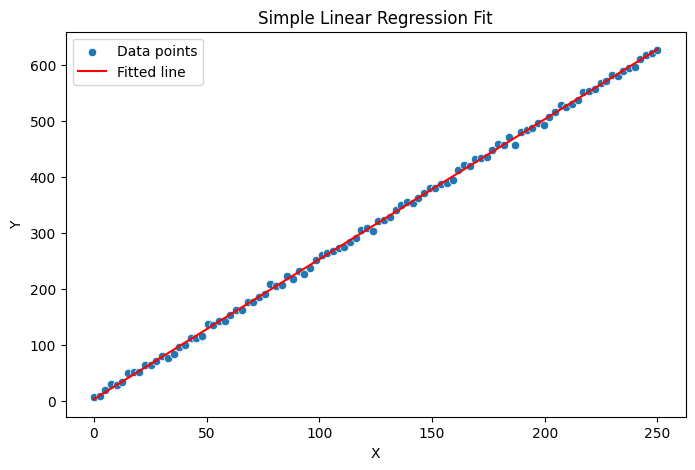

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='X', y='Y', data=df, label='Data points')
sns.lineplot(x=df['X'], y=model.predict(df[['X']]), color='red', label='Fitted line')
plt.title("Simple Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

**R² close to 1 means the model fits the data well. there are no overfitting because train and test scores are similar . If scores were very different, overfitting/underfitting might be occured**

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [ ]:
a1 = 3.0
a2 = -1.5
c = 5.0

In [ ]:
np.random.seed(42)
x1 = np.linspace(0, 50, 100)
x2 = np.linspace(100, 200, 100)

In [ ]:
Y = a1 * x1 + a2 * x2 + c
noise = np.random.normal(0, 10, size=Y.shape)
Y_noisy = Y + noise

In [ ]:
df = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'y': Y_noisy
})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['x1', 'x2']], df['y'], test_size=0.2, random_state=42
)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(" a1:", model.coef_[0])
print(" a2:", model.coef_[1])
print(" c :", model.intercept_)

 a1: 0.004833614375037933
 a2: 0.009667228750075868
 c : -147.76887074517322


In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f"\nTrain - MAE: {train_mae:.2f}, MSE: {train_mse:.2f}, R²: {train_r2:.4f}")


Train - MAE: 7.44, MSE: 86.35, R²: 0.0014


In [ ]:
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test  - MAE: {test_mae:.2f}, MSE: {test_mse:.2f}, R²: {test_r2:.4f}")

Test  - MAE: 6.01, MSE: 62.20, R²: -0.0039


In [ ]:
print("\nNotes:")
if abs(train_r2 - test_r2) < 0.05 and train_r2 > 0.9:
    print("- Model fits very well and generalizes well (no overfitting or underfitting).")
elif train_r2 > test_r2 + 0.05:
    print("- Possible overfitting: train score much higher than test score.")
elif train_r2 < 0.8 and test_r2 < 0.8:
    print("- Possible underfitting: both train and test scores are low.")
else:
    print("- Model performance is acceptable but could be improved with more features or better noise handling.")


Notes:
- Possible underfitting: both train and test scores are low.


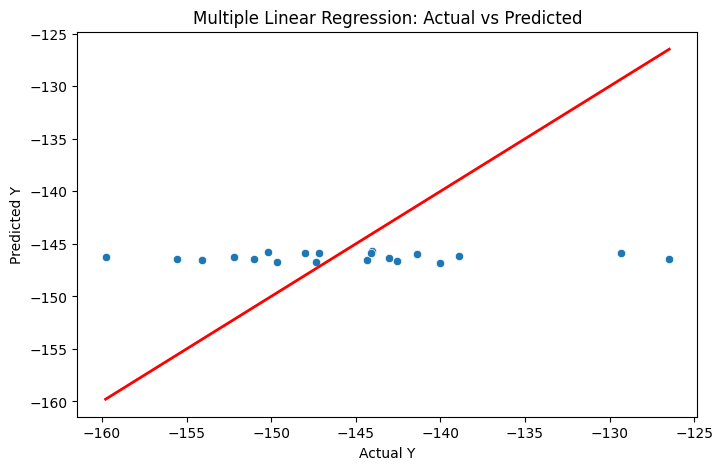

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2)  # perfect prediction line
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.show()

**The model does not fit the data — it essentially produces predictions close to a flat line. Since both training and testing performance are equally poor, Underfitting has occured. This often happened because of scale difference , where X1 and X2 are on very different scales**

# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [ ]:
a = 2.0
b = -3.0
c = 5.0

In [ ]:
X = np.linspace(-10, 10, 200).reshape(-1, 1)
Y = a * X**2 + b * X + c
Y_noisy = Y + np.random.randn(200, 1) * 5

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, Y_noisy, test_size=0.2, random_state=42
)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
print(" a:", model.coef_[0][1])
print(" b:", model.coef_[0][0])
print(" c:", model.intercept_[0])

 a: 2.0003396263960864
 b: -3.062324347293445
 c: 5.214349479293375


In [ ]:
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f"\nTrain - MAE: {train_mae:.2f}, MSE: {train_mse:.2f}, R²: {train_r2:.4f}")


Train - MAE: 4.05, MSE: 24.76, R²: 0.9941


In [ ]:
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test  - MAE: {test_mae:.2f}, MSE: {test_mse:.2f}, R²: {test_r2:.4f}")

Test  - MAE: 3.31, MSE: 19.43, R²: 0.9928


In [ ]:
print("\nNotes:")
if abs(train_r2 - test_r2) < 0.05 and train_r2 > 0.9:
    print("- Model fits very well and generalizes well.")
elif train_r2 > test_r2 + 0.05:
    print("- Possible overfitting: train score much higher than test.")
elif train_r2 < 0.8 and test_r2 < 0.8:
    print("- Possible underfitting: both train and test scores are low.")
else:
    print("- Model performance is acceptable.")


Notes:
- Model fits very well and generalizes well.


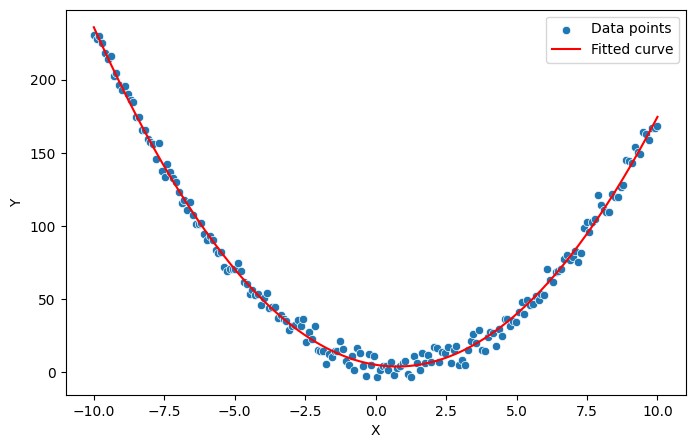

In [ ]:
plt.figure(figsize=(8,5))

# Scatter plot of noisy data
sns.scatterplot(x=X.ravel(), y=Y_noisy.ravel(), label='Data points')

# Line plot of fitted curve
sns.lineplot(
    x=X.ravel(),
    y=model.predict(X_poly).ravel(),
    color='red',
    label='Fitted curve'
)

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


**The model is performing well. No overfitting or underfitting are present. small differences between predicted and actual values are likely due to the noise added to the dataset.**

In [16]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/airlines-flights-data


In [17]:
os.listdir(path)

['airlines_flights_data.csv']

In [18]:
full_path = os.path.join(path,os.listdir(path)[0])

In [19]:
import pandas as pd
df = pd.read_csv(full_path)

In [20]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*


In [21]:
df.shape

(300153, 12)

In [22]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [24]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [25]:
missing = df.isna().sum()
missing

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [26]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [27]:
df.drop(columns=['index'], inplace=True)


In [28]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [29]:
df.dtypes

,0
airline,object
flight,object
source_city,object
departure_time,object
stops,object
arrival_time,object
destination_city,object
class,object
duration,float64
days_left,int64


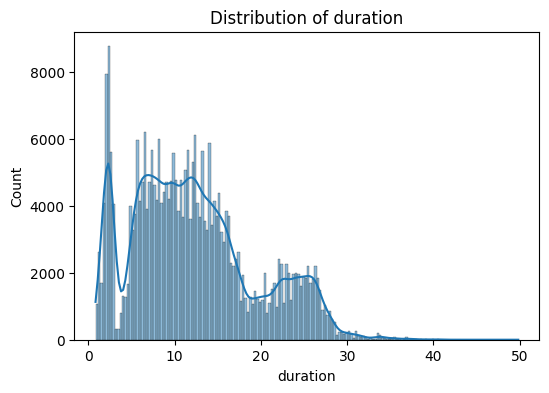

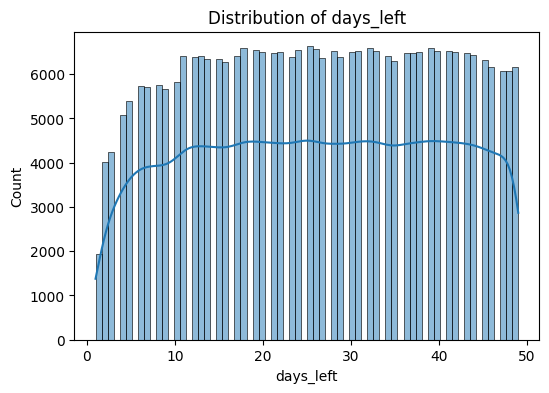

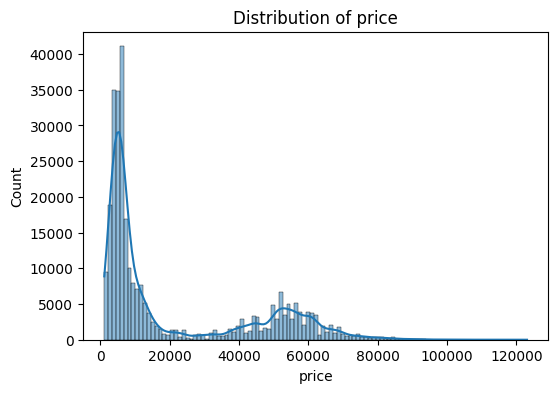

In [31]:
num_cols = ['duration', 'days_left', 'price']
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


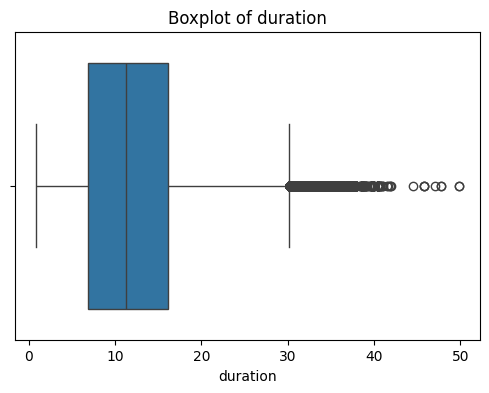

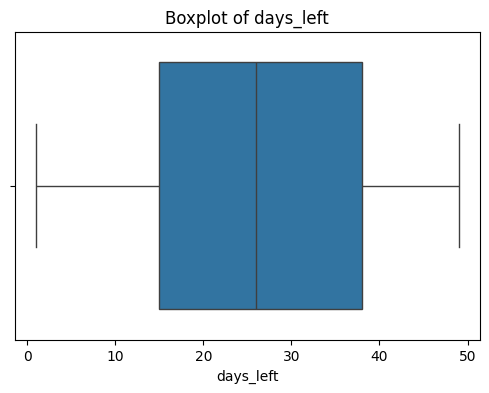

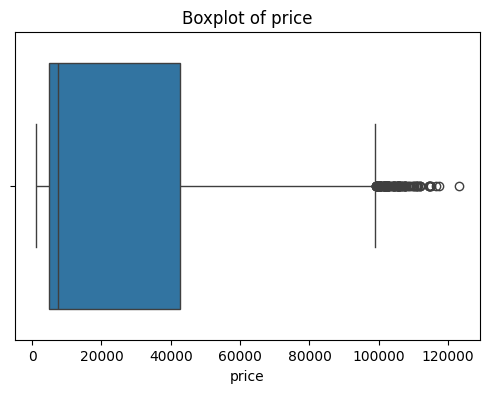

In [32]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

**Boxplot of duration: The majority of the data falls roughly between 5 and 15 days. There are large number of outliers that are extending beyond 30 days**

**Boxplot of days_left appears more symmetrical, with the median close to 25 days. There are no clear outliers**

**In Boxplot of price: There is a large number of outliers for higher prices, extending significantly past 100,000, with some reaching up to 120,000.**

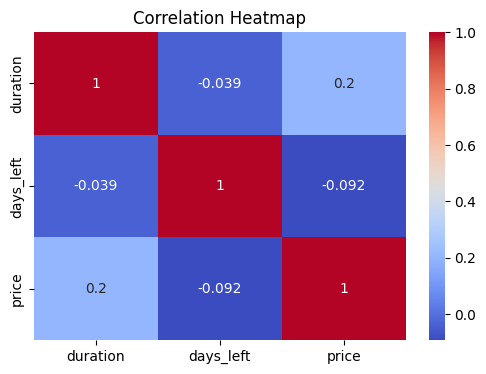

In [33]:
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**a very weak negative linear relationship between Duration and Days_left . The correlation coefficient between duration and price is 0.2, This suggests a weak positive linear relationship.  In Days_left and Price,  the relation very weak negative linear relationship**

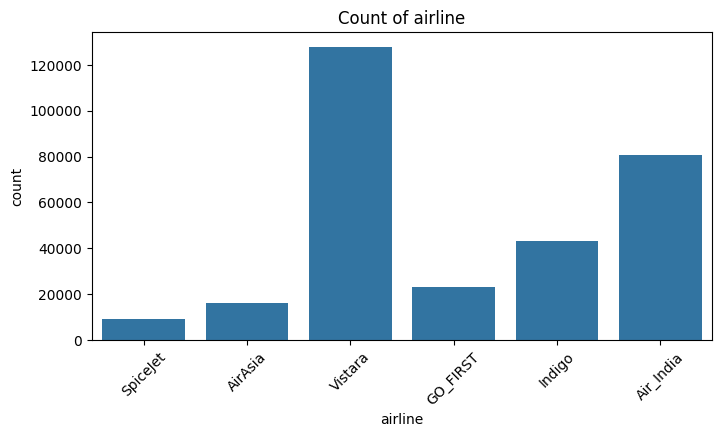

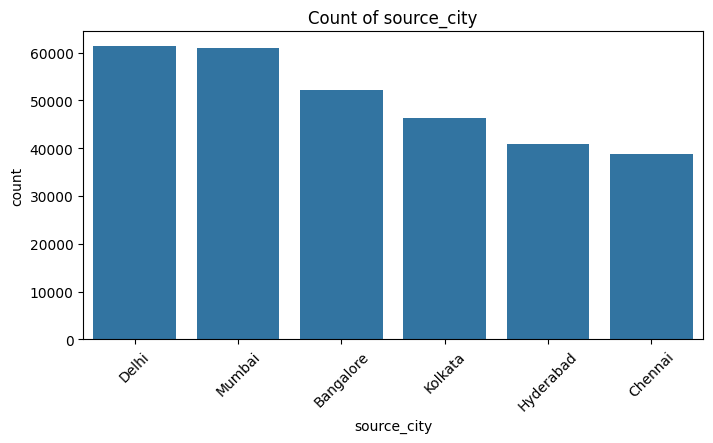

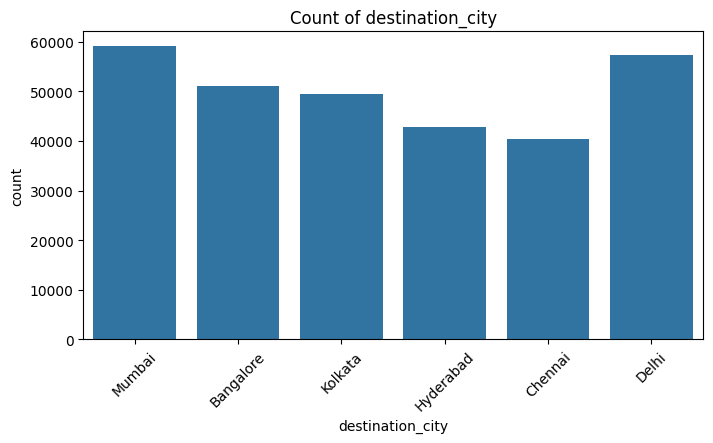

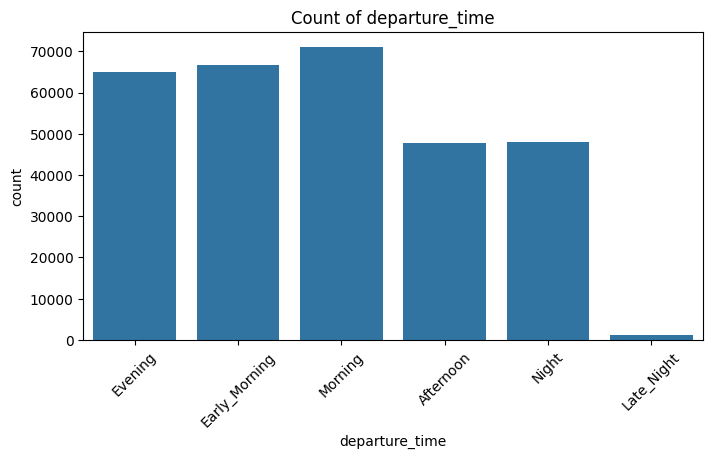

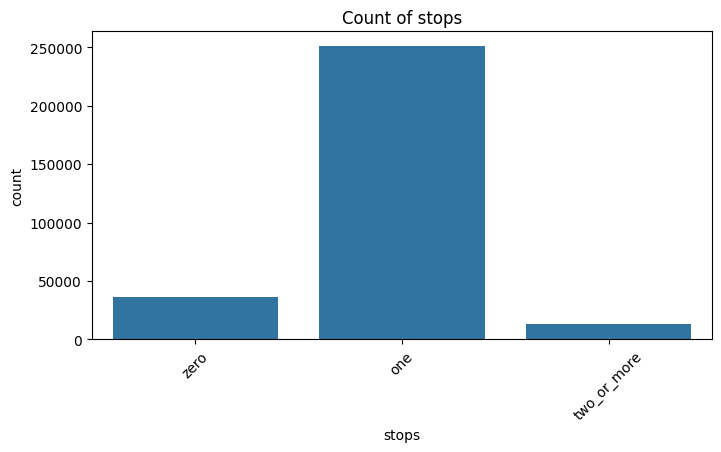

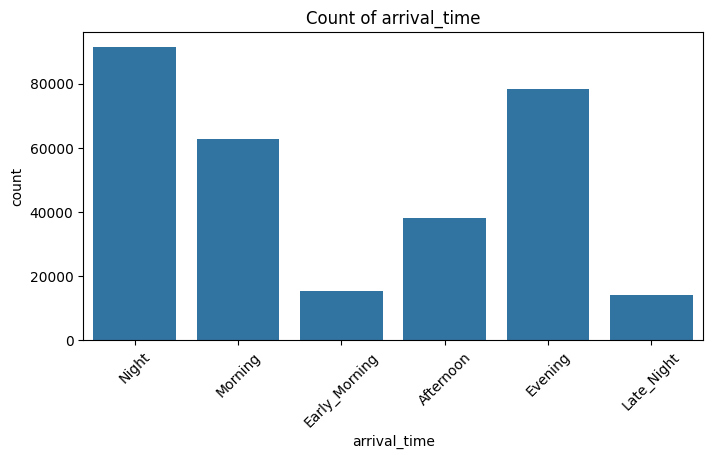

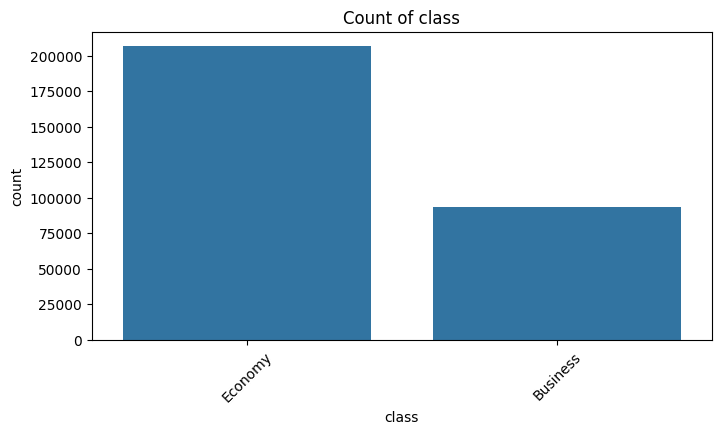

In [34]:
cat_cols = ['airline', 'source_city', 'destination_city', 'departure_time', 'stops', 'arrival_time', 'class']
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
    plt.title(f"Count of {col}")
    plt.show()


**Vistara has the highest number of flights, while SpiceJet has the lowest.**

**Delhi and Mumbai are the most frequent source cities.**

**Mumbai and Delhi are the most common destination cities, while Chennai is the least.**

**Morning departures are the most frequent, and late-night departures are rare.**

**Flights with one stop are the most common, significantly outnumbering direct flights and those with two or more stops**

**Night and Evening arrival times are the most common, while Early Morning and Late Night arrivals are less frequent.**

**Economy class flights are significantly more numerous than Business class flights.**

In [35]:
df = df.drop_duplicates()

In [36]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [37]:
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [38]:
nominal_cols = ['airline', 'flight', 'source_city', 'destination_city']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

In [40]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler

In [41]:
ordinal_cols = ['departure_time', 'arrival_time', 'stops', 'class']
encoder = OrdinalEncoder()
df[ordinal_cols] = encoder.fit_transform(df[ordinal_cols])

In [42]:
scaler = StandardScaler()
df[['duration', 'days_left', 'price']] = scaler.fit_transform(df[['duration', 'days_left', 'price']])

In [43]:
X = df.drop("price", axis=1)
y = df["price"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [47]:
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

Train MAE: 0.1893717169148689
Test MAE: 0.18929144106052687


In [48]:
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))


Train R²: 0.9228991539784136
Test R²: 0.9224766386522906


In [49]:
import joblib
joblib.dump(model, "flight_price_model.pkl")

['flight_price_model.pkl']